# Putting all together


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts.modeling as modeling
import scripts.spotify_api as spotify_api


# Apply the default theme
sns.set_theme()

In [2]:
# Get playlist metadata and tracklist


# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_id")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/dc3f5560d882d3f9...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",True,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,https://p.scdn.co/mp3-preview/e54ac6ee0aa018cf...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,https://p.scdn.co/mp3-preview/bacd8fab60c68555...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill


In [3]:
# build and train model
model, label_encoder, scaler, history, class_report = modeling.build_train(
    df, epochs=20, hidden_sizes=[8, 16, 8], lr=0.01
)

Training Start
Epoch:1 / 20, train loss:1.2548 train_acc:0.4803, valid loss:0.7844 valid acc:0.61947
Epoch:2 / 20, train loss:0.7810 train_acc:0.6491, valid loss:0.6866 valid acc:0.66372
Epoch:3 / 20, train loss:0.7413 train_acc:0.7061, valid loss:0.5956 valid acc:0.83186
Epoch:4 / 20, train loss:0.6013 train_acc:0.7961, valid loss:0.5115 valid acc:0.80531
Epoch:5 / 20, train loss:0.6020 train_acc:0.7917, valid loss:0.4825 valid acc:0.86726
Epoch:6 / 20, train loss:0.5651 train_acc:0.8026, valid loss:0.4031 valid acc:0.85841
Epoch:7 / 20, train loss:0.5644 train_acc:0.8114, valid loss:0.3870 valid acc:0.85841
Epoch:8 / 20, train loss:0.5203 train_acc:0.8070, valid loss:0.3734 valid acc:0.89381
Epoch:9 / 20, train loss:0.4804 train_acc:0.8136, valid loss:0.2820 valid acc:0.91150
Epoch:10 / 20, train loss:0.4727 train_acc:0.8158, valid loss:0.2827 valid acc:0.92035
Epoch:11 / 20, train loss:0.4800 train_acc:0.8531, valid loss:0.3175 valid acc:0.88496
Epoch:12 / 20, train loss:0.4049 trai

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}>,
        <Axes: title={'center': 'Accuracy'}>], dtype=object))

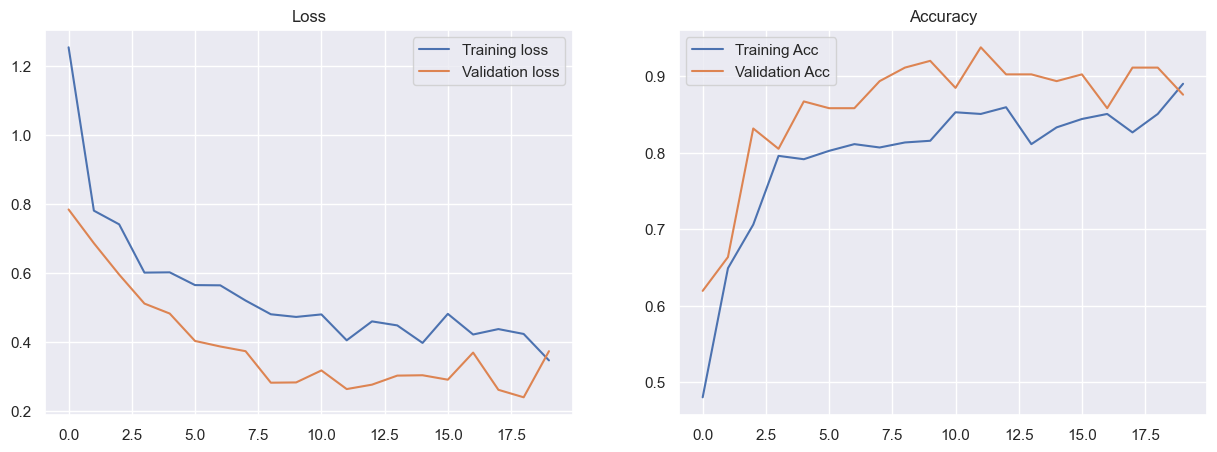

In [4]:
# plot training history
modeling.plot_training_history(history)

In [5]:
# get new tracks
track_id = ["4tekXLedu6wxNhHkKjFkPE", "1AfcE4lyIX7oDCHCPaKPg6"]

# get tracks meta
track_meta = spotify_api.get_tracks_metadata(track_id)

# hit spotify API
af = spotify_api.get_audio_features(track_id)
# merge metadata and audio features
track_df = pd.merge(track_meta, af, on="id")
# extract artist name for easier reading
track_df["artist"] = track_df["artists"].apply(lambda x: x[0]["name"])

track_df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,-4.577,0,0.0783,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,-14.679,0,0.0417,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur


In [6]:
# running inference
inference_df = modeling.model_inference(track_df, model=model, scaler=scaler, label_encoder=label_encoder)
inference_df

,id,name,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist,predicted_label,predicted_probability,all_probabilities
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,193663,False,{'isrc': 'FXQ892400160'},{'spotify': 'https://open.spotify.com/track/4t...,...,0.246,0.000,0.2560,0.6380,110.009,4,FRENCHGRL,Electro chill,0.694769,"{'Electro chill': 0.6947691440582275, 'Hot Cou..."
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,121989,False,{'isrc': 'FXQ892300291'},{'spotify': 'https://open.spotify.com/track/1A...,...,0.858,0.811,0.0861,0.0991,117.003,4,Majeur Mineur,Summer Jazz,0.998782,"{'Electro chill': 0.001203381223604083, 'Hot C..."


In [9]:
inference_df.columns

Index(['id', 'name', 'album', 'artists', 'available_markets', 'disc_number',
       'duration_ms', 'explicit', 'external_ids', 'external_urls', 'is_local',
       'popularity', 'preview_url', 'track_number', 'type', 'uri', 'index',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'artist', 'predicted_label', 'predicted_probability',
       'all_probabilities'],
      dtype='object')

In [7]:
# printing the results
inference_df[["name", "artist", "predicted_label", "predicted_probability"]]

,name,artist,predicted_label,predicted_probability
0,Let's Vibe,FRENCHGRL,Electro chill,0.694769
1,Stumble,Majeur Mineur,Summer Jazz,0.998782


In [8]:
# include in playlist?
playlist_name = "Electro chill"
modeling.include_tracks_to_playlist(
    track_df,
    model=model,
    scaler=scaler,
    label_encoder=label_encoder,
    target_playlist_name=playlist_name,
    probability_threshold=0.7,
)

,id,name,artist,all_probabilities,target_playlist_name,target_playlist_probability,include_in_playlist
0,4tekXLedu6wxNhHkKjFkPE,Let's Vibe,FRENCHGRL,"{'Electro chill': 0.6947691440582275, 'Hot Cou...",Electro chill,0.694769,False
1,1AfcE4lyIX7oDCHCPaKPg6,Stumble,Majeur Mineur,"{'Electro chill': 0.001203381223604083, 'Hot C...",Electro chill,0.001203,False
